# Titanic Survival Analysis Project

### In this proejct I analyse a dataset of Titanic passengers and make conclusions as to which criteria made people more likely to survive.

I took the Titanic Dataset from a Udacity link, which in turn linked to the dataset stored on Kaggle.com.

I will answer the following questions:

1) What was the gender distribution in the group? Who were more likely to survive depending on the gender? 

2) What was the age distribution in the group? Passengers of what age were more likely to survive?

3) What was the travel class distribution in the group? Passents of which travel class were more likely to survive?

4) Is there a correlation between the existence of children/parents and the chances of survival? Were passengers with children/parents more likely to survive than those travelling alone?

5) Who had the maximum chances of survival in terms of gender/age/class?


In [5]:
# Extract the passenger data from a csv file and store it as a pandas DataFrame

import pandas as pd
import numpy as np

titanic_data = pd.read_csv('titanic_data.csv')

In [6]:
# Print the tail of the dataset to look at the entries
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### The description of the fields from Kaggle.com

Data Dictionary
Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st (Upper), 2 = 2nd (Middle), 3 = 3rd (Lower)
sex	Sex	
Age	Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp	# of siblings / spouses aboard the Titanic
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)
parch	# of parents / children aboard the Titanic
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
ticket	Ticket number
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Data wrangling

In [7]:
# Identify if there are any duplicates
print ('The number of duplicate entries is {}.'.format(titanic_data.duplicated().sum()))

The number of duplicate entries is 0.


In [8]:
# Let's see some statistics about the dataset
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Remove unnecessary colums 
The columns 'PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin' and 'Embarked' are not relevant for my analysis and will be removed.

In [9]:
titanic_data_short = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1)

In [10]:
# Display the resulting dataframe
titanic_data_short.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


## Data analysis

In this section I will try to answer the above questions based on the analysis of the Titanic dataset.

### 1) What was the gender distribution in the group? Is there a correlation between gender and the chances of survival?

In [11]:
gender = titanic_data_short['Sex'].value_counts()

print ('There were {} females and {} males on board.'.format(gender['female'], gender['male']))

There were 314 females and 577 males on board.


In [12]:
group_by_gender_survived = titanic_data_short.groupby(['Sex','Survived']).size()
group_by_gender_survived

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

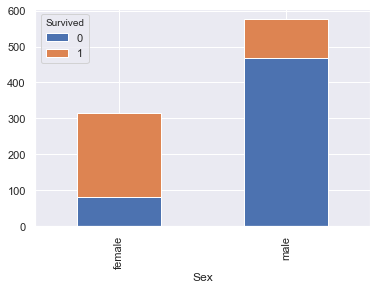

In [13]:
# Visualise the distribution of total males and females and those who survived among each group
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
titanic_data_short.groupby(['Sex','Survived']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [14]:
# Calculate the percentage of survived in a group
# Returns survival rate/percentage of gender
def survival_rate_gender(gender):
    # Take the gender and return the survival rate
    grouped_by_gender = titanic_data_short.groupby(['Sex']).size()[gender].astype('float')
    grouped_by_gender_survived = titanic_data_short.groupby(['Survived','Sex']).size()[1, gender].astype('float')
    survival_rate_gender = (grouped_by_gender_survived / grouped_by_gender * 100).round(2)

    return survival_rate_gender

In [15]:
print('The average survival rate for females was {}%.'.format(survival_rate_gender('female')))
print('The average survival rate for males was {}%.'.format(survival_rate_gender('male')))

The average survival rate for females was 74.2%.
The average survival rate for males was 18.89%.


### Conclusion to Question 1:
### Women were much likely to survive than men with the survival rates being 74.2% vs. 18.9% 

### 2) What was the age distribution in the group? Is there a correlation between the age and the chances of survival?

In [16]:
print ('We saw before that the information about the age was missing for {} entries.'.
       format(titanic_data_short['Survived'].count()- titanic_data_short['Age'].count()))

We saw before that the information about the age was missing for 177 entries.


In [17]:
# Identify the missing age entries and remove them from the dataset
no_age_entries = pd.isnull(titanic_data_short['Age'])
titanic_data_short[no_age_entries].head()

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [18]:
titanic_data_short_with_age = titanic_data_short.dropna()
titanic_data_short_with_age.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


We see that the largest group was from approximately 20 y.o. till approximately 33 y.o.


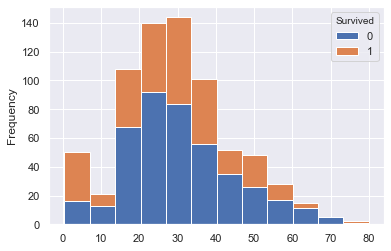

In [19]:
titanic_data_short_with_age.pivot(columns='Survived').Age.plot(kind = 'hist', stacked=True, bins = 12)

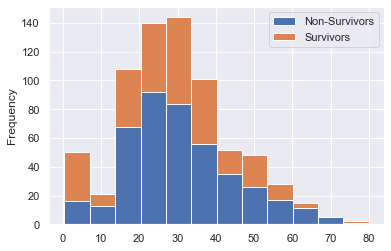

In [20]:
pd.DataFrame({'Non-Survivors': titanic_data_short_with_age.groupby('Survived').get_group(0).Age,
              'Survivors':titanic_data_short_with_age.groupby('Survived').get_group(1).Age}).plot.hist(stacked=True, bins = 12)

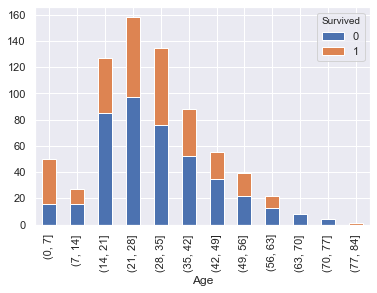

In [21]:
titanic_data_short_with_age.groupby(['Survived', pd.cut(titanic_data_short_with_age['Age'], np.arange(0,100,7))])\
       .size().unstack(0).plot.bar(stacked=True)

From the above histograms we see that almost in all age categories the number of survived was lower than the number of drowned, except for young children (0-7 years). In the category from 63 to 77 all passengers died and a very little number above 77 y.o. survived. Let's explore these facts a bit deeper.

First, let's calculated the mean age of those who survived and the mean age of those who did not survive. Then we calculate the percentage of survivors in the age category from 0 to 7 y.o. And try to identify how many persons above 77 years there are who survived.

In [22]:
titanic_data_short_with_age.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

The mean for those who did not survive (28.34) is very close to those who did not survive (30.62). This prompts me to conclude that, apart for children, there was not much dependence of the survival chances on the age.

In [32]:
bins= [0,8,15,64,78,85]
labels = ['Children','Teens','Main','Elder','Oldest']
titanic_data_short_with_age.loc[:,'AgeGroup'] = pd.cut(titanic_data_short_with_age['Age'], bins=bins, labels=labels, right=False)
titanic_data_short_with_age.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,AgeGroup
0,0,3,male,22.0,1,0,Main
1,1,1,female,38.0,1,0,Main
2,1,3,female,26.0,0,0,Main
3,1,1,female,35.0,1,0,Main
4,0,3,male,35.0,0,0,Main


In [24]:
# Calculate the survaval rate for each age group.
age_groups = titanic_data_short_with_age.groupby(['AgeGroup','Survived'])



In [25]:
age_survaval = pd.DataFrame({'Non-Survivors': titanic_data_short_with_age.groupby('Survived').get_group(0).AgeGroup,
              'Survivors':titanic_data_short_with_age.groupby('Survived').get_group(1).AgeGroup})
not_survived = titanic_data_short_with_age[titanic_data_short_with_age['Survived'] == False]['AgeGroup'].count()
print('In total {} people did not survive.'.format(not_survived))


In total 424 people did not survive.


In [26]:
# The distribution among the age groups is as follows:
agegroup = titanic_data_short_with_age['AgeGroup'].value_counts()
agegroup

Main        623
Children     50
Teens        28
Elder        12
Oldest        1
Name: AgeGroup, dtype: int64

In [27]:
# Return the survival rate for every age group
def survival_rate_age(age_group):
    # Take the age group and return the survival rate
    age_group_total = agegroup[age_group].astype('float')
    try:
        grouped_by_age_survived = titanic_data_short_with_age.groupby(['Survived','AgeGroup']).size()[1, age_group].astype('float')
        return (grouped_by_age_survived / age_group_total * 100).round(2)
    except KeyError as exc:
        return 0

In [28]:
print('The average survival rates were as follows:')
print('for children - {}%.'.format(survival_rate_age('Children')))
print('for teens - {}%.'.format(survival_rate_age('Teens')))
print('for adults - {}%.'.format(survival_rate_age('Main')))
print('for elderly people - {}%.'.format(survival_rate_age('Elder')))
print('for seniors - {}%.'.format(survival_rate_age('Oldest')))


The average survival rates were as follows:
for children - 68.0%.
for teens - 39.29%.
for adults - 39.17%.
for elderly people - 0%.
for seniors - 100.0%.


### Conclusion to Question 2:
#### Children under 7 y.o. were the most likely to survive with the survival rate being 68%. The survival rate for seniors of 100.0% is incidental. There was only one senior person in the group and this person survived.
#### However, in the group of elderly people from 64 to 77 y.o. nobody survived. So I will make a tentative conlcusion that for older people the changes of survival were very low.

### Question No. 3 
### What was the travel class distribution in the group? Is there a correlation between the travel class and the chances of survival?

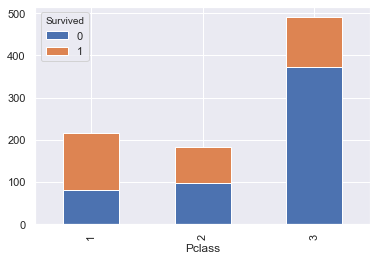

In [29]:
# Visualise the distribution of total passenders by travel class and those who survived in each travel class
titanic_data_short.groupby(['Pclass','Survived']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [37]:
distribution_by_class = titanic_data_short.groupby(['Pclass']).size()
print ('There were {} 1st class passengers, {} 2nd class passengers and {} 3rd class passengers on board.'
       .format(distribution_by_class[1], distribution_by_class[2], distribution_by_class[3]))

There were 216 1st class passengers, 184 2nd class passengers and 491 3rd class passengers on board.


In [ ]:
# Calculate the percentage of survived in a given travel class
# Returns survival rate for the travel class
def survival_rate_tclass(tclass):
    # Take the travel class and return the survival rate
    grouped_by_tclass = titanic_data_short.groupby(['Pclass']).size()[tclass].astype('float')
    grouped_by_tclass_survived = titanic_data_short.groupby(['Survived','Pclass']).size()[1, tclass].astype('float')
    survival_rate_tclass = (grouped_by_tclass_survived / grouped_by_tclass * 100).round(2)

    return survival_rate_tclass

In [ ]:
print('Out of the total of {} passengers, the survaval rates depending on the travel class were:\n'
      .format(len(titanic_data_short)))
for i in range(1, 4):
    print('For travel class {} passenders: {}%'.format(i, survival_rate_tclass(i)))

### Conclusion to Question 3:
#### The passengers in the 1st travel class had the highest survival rate of almost 63%, while the passengers from the 3rd travel class had the lowest chances to survive of a little over 24%.

### Question No. 4
### Is there a correlation between the existence of children/parents and the chances of survival? Is there a correlation between the existence of siblings/spouses and the chances of survival?

At first I will divide the population into those who had no children/parents and those who had children/parents, and calculate the survival rates for each group.

In [39]:
bins = [0, 0.5, 10]
labels = ['alone','par_chil']
titanic_data_short.loc[:,'Relations'] = pd.cut(titanic_data_short['Parch'], bins=bins, labels=labels, right=False)
titanic_data_short.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Relations
886,0,2,male,27.0,0,0,alone
887,1,1,female,19.0,0,0,alone
888,0,3,female,NaN,1,2,par_chil
889,1,1,male,26.0,0,0,alone
890,0,3,male,32.0,0,0,alone


In [40]:
distribution_by_relations = titanic_data_short['Relations'].value_counts()

In [344]:
print ('The numbers of passengers travelling alone or with parents/children are:\n{}'.
       format(distribution_by_relations))

The numbers of passengers travelling alone or with parents/children are:
alone       678
par_chil    213
Name: Relations, dtype: int64


In [345]:
# Calculate the survided in each group
group_by_relations = titanic_data_short.groupby('Relations', as_index = False)
group_by_relations['Survived'].sum()

,Relations,Survived
0,alone,233
1,par_chil,109


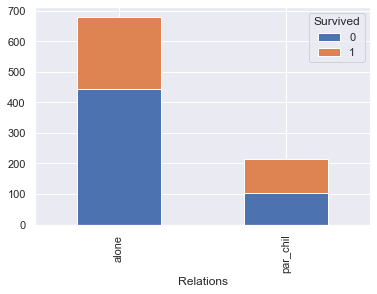

In [346]:
# Visualise the distribution of total passenders by relations and those who survived in each group
titanic_data_short.groupby(['Relations','Survived']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [372]:
print ('There were {} passengers travelling alone and {} passengers travelling with parents or children on board.'
       .format(alone, par_chil))

There were 678 passengers travelling alone and 213 passengers travelling with parents or children on board.


In [429]:
# Calculate the percentage of survived depending on family relations
# Returns survival rate for the given family category
def family_survival_rate(category):
    # Take the family category (alone or with parents/children) and return the survival rate
    grouped_by_relation = titanic_data_short.groupby(['Relations']).size()[category].astype('float')
    grouped_by_relation_survived = titanic_data_short.groupby(['Survived','Relations']).size()[1, category].astype('float')
    survival_rate_relation = (grouped_by_relation_survived / grouped_by_relation * 100).round(2)

    return survival_rate_relation

In [430]:
print('Out of the total of {} passengers, the survaval rates depending on the family relations were:\n'
      .format(len(titanic_data_short)))
print('For passenders travelling alone the survival rate was: {}%'.format(family_survival_rate('alone')))
print('For passenders travelling with parents/children the survival rate was: {}%'.format(family_survival_rate('par_chil')))

Out of the total of 891 passengers, the survaval rates depending on the family relations were:

For passenders travelling alone the survival rate was: 34.37%
For passenders travelling with parents/children the survival rate was: 51.17%


#### Conclusion to Question 4: Passengers travelling with children/parents were more likely to survive (51%) than passengers travelling alone (34%).

### Question No. 5: Who had the maximum chances of survival in terms of gender/age/class/existence of children/parents?

From the above analysis and histograms we already saw that women, 1st class passengers and children were more likely to survive than other passengers. Analysing the chances of survivel for elderly people does not make much sense as we don't have a representative group of elderly people and saw that most of them died.

So, for the purposes of this analysis I will compare the survival rate for people with most chances to survive:
women (of the main age category) and children travelling in the 1st class 
to the survival rate for men (from the main age category) and children travelling in the 3rd class.

In [431]:
titanic_data_short_with_age.groupby(['AgeGroup', 'Sex', 'Pclass', 'Survived']).size()



AgeGroup  Sex     Pclass  Survived
Children  female  1       0             1
                  2       1             7
                  3       0             5
                          1            11
          male    1       1             2
                  2       1             8
                  3       0            10
                          1             6
Teens     female  1       1             1
                  2       1             3
                  3       0             9
                          1             2
          male    1       1             1
                  2       1             1
                  3       0             8
                          1             3
Main      female  1       0             2
                          1            81
                  2       0             6
                          1            58
                  3       0            41
                          1            34
          male    1       0            54

In [445]:
# Return survival rate depending on the agegroup, travel class and gender
def specific_survival_rate(agegroup, pclass, sex):
    
    titanic_data_grouped_total = \
    titanic_data_short_with_age.groupby(['AgeGroup','Pclass', 'Sex']).size()[agegroup, pclass, sex].astype('float')
    try:
        titanic_data_grouped_survived = \
    titanic_data_short_with_age.groupby(['AgeGroup','Pclass','Survived','Sex']).size()[agegroup, pclass, 1, sex].astype('float')
        return (titanic_data_grouped_survived / titanic_data_grouped_total * 100).round(2)
    except KeyError as exc:
        return 0
    
# Return survival rate for children depending on the travel class
def children_survival_rate(pclass, agegroup = 'Children'):
    titanic_data_grouped_total = \
    titanic_data_short_with_age.groupby(['Pclass','AgeGroup']).size()[pclass, agegroup].astype('float')
    try:
        titanic_data_grouped_survived = \
    titanic_data_short_with_age.groupby(['Pclass','AgeGroup','Survived']).size()[pclass, agegroup, 1].astype('float')
        return (titanic_data_grouped_survived / titanic_data_grouped_total * 100).round(2)
    except KeyError as exc:
        return 0
    
    

#### Now that we have all the functions ready, let's print the survival rates of the categories of interest to us.


In [463]:
for i in range(1,4):
    print ('The survival rate for women travelling in class {} was: {}.'.format(i, specific_survival_rate('Main', i, 'female')))
for i in range(1,4):
    print ('The survival rate for children travelling in class {} was: {}.'.format(i, children_survival_rate(i))) 
for i in range(1,4):
    print ('The survival rate for men travelling in class {} was: {}.'.format(i, specific_survival_rate('Main', i, 'male')))



The survival rate for women travelling in class 1 was: 97.59.
The survival rate for women travelling in class 2 was: 90.62.
The survival rate for women travelling in class 3 was: 45.33.
The survival rate for children travelling in class 1 was: 66.67.
The survival rate for children travelling in class 2 was: 100.0.
The survival rate for children travelling in class 3 was: 53.12.
The survival rate for men travelling in class 1 was: 40.0.
The survival rate for men travelling in class 2 was: 6.82.
The survival rate for men travelling in class 3 was: 13.0.


#### Conclusion to Question 5: Women travelling in the first and second classes had the highest survival rate - from 90.6 to over 97%.
#### Children in the second class were rescued all and children in the 3rd class had a comparable survival rate as children in the 1st class. I make a tentative conclusion from this that children were let to the salvation boats on equal terms from all three travel classes.
#### Men had the lowest survival rate. Even in the 1st travel class the survival rate was 40%, going down to 7% for the 2nd class and 13% for the 3rd class.

### Conclusion
Women travelling in the 1st and 2nd classes and all children were let to the salvation boats on a priority basis.
No conclusion can be made as to the differences in the terms of salvation of men in the 2nd and 3rd classes. Same holds true about saving children. The dataset doesn't let us reliably conclude why so many children died in the 1st and 3rd classes and every child travelling in the 2nd class survived.